In [1]:
# Libraries
import numpy as np
import random

### Matrix setup

In [2]:
n = 5

In [3]:
size = 2**n + 1

In [4]:
matrix = np.zeros((size, size))

In [5]:
matrix[0][0], matrix[-1][0], matrix[-1][-1], matrix[0][-1] = [random.randint(-1000,1000) for i in range(4)]

### Diamond-Square implementation

In [6]:
# Determines midpoint between two points
def midPoint(p1, p2):
    h = int((p1[0]+p2[0]+1)/2)
    v = int((p1[1]+p2[1]+1)/2)
    return [h, v]

In [7]:
# Random value added
inf = -1000
sup = 1000
def randVal(r):
    return random.randint(inf, sup)/r

In [8]:
# Sets value for middle of square and middle of edges (diamond and square step)
# def positionMeans:

In [9]:
# Implementation of the algorithm with recursivity
def diamondSquare (matrix, low, high,r):
    # Determination of corners
    ul = [low, low]
    ur = [low, high]
    ll = [high, low]
    lr = [high, high]
    
    # Middle Point
    mid = midPoint(ul, lr)
    matrix[mid[0]][mid[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[ul[0]][lr[1]],matrix[lr[0]][ul[1]],matrix[lr[0]][lr[1]]])+random.randint(-1000,1000)/r
    
    # Middle Left
    if matrix[mid[0]][ul[1]] == 0:
        matrix[mid[0]][ul[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[lr[0]][ul[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Up
    if matrix[ul[0]][mid[1]] == 0:
        matrix[ul[0]][mid[1]] = np.mean([matrix[ul[0]][ul[1]],matrix[ul[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Right
    if matrix[mid[0]][lr[1]] == 0:
        matrix[mid[0]][lr[1]] = np.mean([matrix[ul[0]][lr[1]],matrix[lr[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Middle Down
    if matrix[lr[0]][mid[1]] == 0:
        matrix[lr[0]][mid[1]] = np.mean([matrix[lr[0]][ul[1]],matrix[lr[0]][lr[1]],matrix[mid[0]][mid[1]]])+randVal(r)
    
    # Counts zeros to determine whether or not to call function again
    zeros = np.count_nonzero(matrix == 0)
    
    if zeros > 0:
        # Increment of r to reduce size of random number added
        r += 1
        
        # Upper left quadrant
        matrix[:mid[0]+1,:mid[0]+1] = diamondSquare(matrix[:mid[0]+1,:mid[0]+1], low, mid[0], r)
        
        # Upper right quadrant
        matrix[:mid[0]+1,mid[0]:high+1] = diamondSquare(matrix[:mid[0]+1,mid[0]:high+1], low, mid[0], r)
        
        # Lower left quadrant
        matrix[mid[0]:high+1,:mid[0]+1] = diamondSquare(matrix[mid[0]:high+1,:mid[0]+1], low, mid[0], r)
        
        # Lower right quadrant
        matrix[mid[0]:high+1,mid[0]:high+1] = diamondSquare(matrix[mid[0]:high+1,mid[0]:high+1], low, mid[0], r)    
    
    return matrix

In [10]:
low = 0
high = size-1
r = 1
matrix = diamondSquare(matrix, low, high,r)
print(matrix)

[[-458.         -379.92124681 -550.74053001 ...  837.51526301
   865.5916694   880.        ]
 [-493.8885033  -379.12321042 -421.05791754 ...  854.79726421
   883.45974518  960.8671388 ]
 [-375.44229949 -474.02517403 -467.11001219 ...  753.38204649
   837.7611543   847.34167123]
 ...
 [-542.39683045 -512.20902176 -461.91049296 ...  -14.03291486
   -16.13032117  -73.79434537]
 [-622.48547051 -532.3595811  -574.93369168 ...  -84.04302342
   -65.72861877  -49.47432138]
 [-538.         -603.79686069 -528.33100098 ...  -66.88721485
    26.92805546  -77.        ]]


### Graph

In [11]:
# Generating coordinates
x = []
y = []
z = []
for i in range(len(matrix)):
    for j in range(len(matrix)):
        x.append(i)
        y.append(j)
        z.append(matrix[i][j])
        
x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

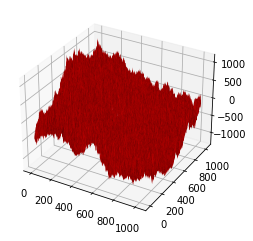

In [12]:
# MatplotLib 3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes(projection='3d')

ax.plot_trisurf(x,y,z, color='r')